##### We are going to optimize a Feed Forward Neural Network using `tf.GradientTape` on a synthatic data

In [1]:
from __future__ import unicode_literals

In [2]:
import tensorflow as tf
import numpy as np

We will try to fit the following polynomial in a Feed Forward Neural Network:


`y = 2*x^2 + 3`

That is we are going to generate synthetic data using the equation and use the data to fit a DNN using low level functions in Tensorflow

In [267]:
def get_y(x):
    return  2*x**2 + 3

#### Generate Data

In [268]:
x = np.linspace(0, 10, num =10000)

In [269]:
y = get_y(x)

In [270]:
x

array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       9.99799980e+00, 9.99899990e+00, 1.00000000e+01])

In [271]:
y

array([  3.      ,   3.000002,   3.000008, ..., 202.92    , 202.959998,
       203.      ])

#### Define weights For the Network

In [272]:
W = tf.random.uniform(
    shape = (1,500), maxval=1.,
    dtype=tf.float32
)

In [273]:
W = tf.Variable(W)

In [274]:
tf.reduce_sum(W)

<tf.Tensor: shape=(), dtype=float32, numpy=270.76453>

In [275]:
b = tf.random.uniform(
    shape = (1,500), maxval=1.,
    dtype=tf.float32
)

In [276]:
b = tf.Variable(b)

In [277]:
W1 = tf.random.uniform(
    shape = (500,1), maxval=1.,
    dtype=tf.float32
)

In [278]:
W1 = tf.Variable(W1)

In [279]:
b1 = tf.constant(1.)

In [280]:
b1 = tf.Variable(b1)

In [281]:
from tqdm import tqdm_notebook

In [282]:
lr = 0.0001

In [283]:
loss_data = []

### The Optimization Step

##### We optimize the Network by calculating the loss (`rmse`) and calculating the gradient of the loss with the defined weights

In [338]:
for _ in tqdm_notebook(range(5)):
    
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([W, W1, b1, b])
        hidden_one = tf.matmul(
            tf.constant(x, shape=(10000,1), dtype = tf.float32), W) + b

        hidden_out = tf.math.tanh(hidden_one)

        output = tf.squeeze(tf.matmul(hidden_out, W1) + b1)

        diff = output - tf.constant(y, shape=(10000,), dtype = tf.float32) 
        l = tf.math.sqrt(diff*diff)
#         print(l)
        loss = tf.reduce_mean(l)
        loss = tf.reduce_mean(tf.square(output - tf.constant(y, shape=(10000,), dtype = tf.float32)))
        print("loss:", loss)
        loss_data.append(loss.numpy())
    #update
    W.assign_sub(lr*tape.gradient(loss, W))
    b.assign_sub(lr*tape.gradient(loss, b))
    W1.assign_sub(lr*tape.gradient(loss, W1))
    b1.assign_sub(lr*tape.gradient(loss, b1))
#     W = W - lr*tape.gradient(loss, W)
#     b = b - lr*tape.gradient(loss, b)
#     W1 = W1 - lr*tape.gradient(loss, W1)
#     b1 = b1 - lr*tape.gradient(loss, b1)
#     print(tf.reduce_sum(W))

/home/bxm200000/anaconda3/envs/bert_keyword/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/5 [00:00<?, ?it/s]

loss: tf.Tensor(0.6112833, shape=(), dtype=float32)
loss: tf.Tensor(0.61126995, shape=(), dtype=float32)
loss: tf.Tensor(0.61125976, shape=(), dtype=float32)
loss: tf.Tensor(0.61124873, shape=(), dtype=float32)
loss: tf.Tensor(0.61124, shape=(), dtype=float32)


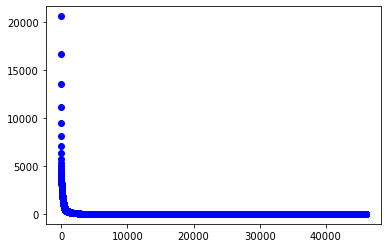

In [339]:
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(list(range(len(loss_data) -1)), loss_data[1:], c="b")
plt.show()

In [340]:
len(loss_data)

46005

##### We run the loop total 46005 times

#### Let's crosscheck the output

In [336]:
def output(x):
    hidden_one = tf.matmul(
        tf.constant(x, shape=(len(x),1), dtype = tf.float32), W) + b

    hidden_out = tf.math.tanh(hidden_one)

    output = tf.squeeze(tf.matmul(hidden_out, W1) + b1)
    return output

#### Initial Outputs

#### We keep on checking the outputs after each 10000 loops and check how close they are to the actual output. Following are the outputs after each check

In [293]:
output(np.array([1, 2]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 4.57924 , 10.888973], dtype=float32)>

#### The answer should be [5, 11] and we are pretty close to it. Let's go back and optimize a little a more 

In [297]:
output(np.array([1, 2]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6.5878315, 11.280268 ], dtype=float32)>

#### This is a little more than what we want. Let's optimize a little further to reach the sweet spot

### 1

In [301]:
output(np.array([1, 2]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7.341418, 11.286435], dtype=float32)>

In [303]:
output(np.array([0, 3]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-8.16433, 19.83773], dtype=float32)>

### 2

In [308]:
output(np.array([0, 3]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-7.2222586, 19.806597 ], dtype=float32)>

### 3

In [313]:
output(np.array([0, 3]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.9739256, 20.79124  ], dtype=float32)>

### 4

In [318]:
output(np.array([0, 2]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.5931677, 10.039997 ], dtype=float32)>

In [320]:
output(np.array([1, 2, 4, 6]))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 5.8381166, 10.039997 , 35.67014  , 74.47184  ], dtype=float32)>

In [322]:
output(np.array([0, 1, 2, 4, 6]))

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-1.5931677,  5.8381166, 10.039997 , 35.67014  , 74.47184  ],
      dtype=float32)>

### 5

In [332]:
output(np.array([0, 1, 2, 4, 6, 10]))

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([ -1.035438,   5.614952,  10.08251 ,  35.697678,  74.477745,
       199.4013  ], dtype=float32)>

In [333]:
[get_y(i) for i in [0, 1, 2, 4, 6, 10]]

[3, 5, 11, 35, 75, 203]

### 6

In [337]:
output(np.array([0, 1, 2, 4, 6, 10]))

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([ -0.7139498,   5.501662 ,  10.15973  ,  35.665886 ,  74.504395 ,
       199.73715  ], dtype=float32)>

#### We are pretty close to the actual output. We have been able to optimize the DNN only using the low level APIs of tensorflow